In [115]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import numpy as np
from collections import Counter

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'

In [315]:
attack = 'BtwU'

In [316]:
dfs = {}
N0 = {}

In [317]:
N_values = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005, 0.00025]
max_seed = 5000

In [525]:
for i, (N, p) in list(enumerate(zip(N_values, p_values)))[-3:]:
    print(N)

    N0_values = []
    Ngcc_values = []
    Sgcc_values = []
    Nsec_values = []
    meanS_values = []
    meanS2_values = []
    
    for seed in range(max_seed):
        network_base = 'ER_N{}_p{}'.format(N, p)
        network = network_base + '_{:05d}'.format(seed)
        attack_dir_name = os.path.join(net_dir_name, network_base, network, attack)
        
        full_file_name  = os.path.join(attack_dir_name, 'comp_data_' + network + '.txt')
        if not os.path.isfile(full_file_name):
            continue
        #else:
        #    print(seed)
        aux = np.loadtxt(full_file_name, dtype=float)
        _Ngcc_values = np.append(aux[:,0], np.repeat(1, (N-len(aux[:,0]))))
        _Nsec_values = np.append(aux[:,1], np.repeat(1, (N-len(aux[:,1]))))
        _meanS_values = np.append(aux[:,2], np.repeat(1, (N-len(aux[:,2])))) 
        _meanS2_values = np.append(aux[:,3], np.repeat(1, (N-len(aux[:,3])))) 
        
        _Sgcc_values = _Ngcc_values / np.arange(N, 0, -1)
    
        Ngcc_values.append(_Ngcc_values)
        Sgcc_values.append(_Sgcc_values)
        Nsec_values.append(_Nsec_values)
        meanS_values.append(_meanS_values)
        meanS2_values.append(_meanS2_values)
        N0_values.append(_Ngcc_values[0])

    N0[N] = np.mean(N0_values)    
    d = {'t': np.arange(N)/N,  'Sgcc': np.mean(Ngcc_values, axis=0)/N, 
         'SgccV2': np.mean(Sgcc_values, axis=0), 
         'varSgcc': np.var(Sgcc_values, axis=0)*np.arange(N, 0, -1),
         'varSgccV2': np.var(Ngcc_values, axis=0)/N,
         'varSgccV3': np.var(Ngcc_values, axis=0)/np.mean(Ngcc_values, axis=0), 
         'Nsec': np.mean(Nsec_values, axis=0), 'meanS': np.mean(meanS_values, axis=0),
         'meanS2': np.nanmean(meanS2_values, axis=0)}
    df = pd.DataFrame(data=d)
   
    dfs[N] = df

4000


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice


8000
16000


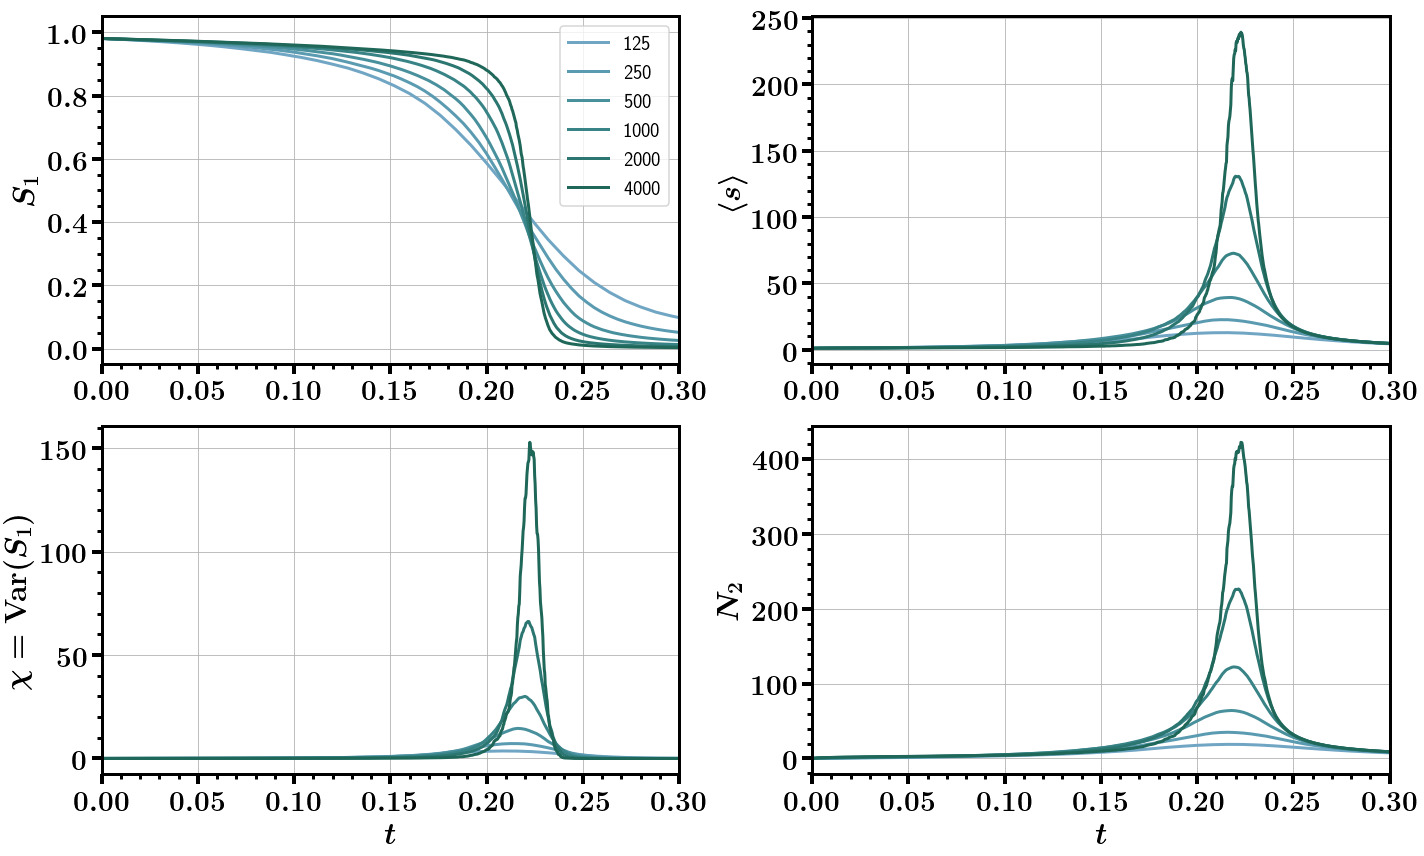

In [349]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values[:-2]

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0., 0.3)
    ax.grid(True)

ax = axes[0][0]
#ax.plot(dfs[N]['t'], 1-dfs[N]['t'], color='black', linestyle='-.', label='')
for N in _N_values:
    #ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/(dfs[N]['Sgcc'][0]*(1-dfs[N]['t'])), label='{}'.format(N))
    ax.plot(dfs[N]['t'], dfs[N]['SgccV2'], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
#ax.set_ylim(0.6, 1)
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][0]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['varSgcc'])
ax.set_ylabel(r'$\chi = \mathrm{Var}(S_1) $')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Nsec'])
ax.set_ylabel(r'$N_2$')

axes[1][0].set_xlabel(r'$t$')
axes[1][1].set_xlabel(r'$t$')

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_btw')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

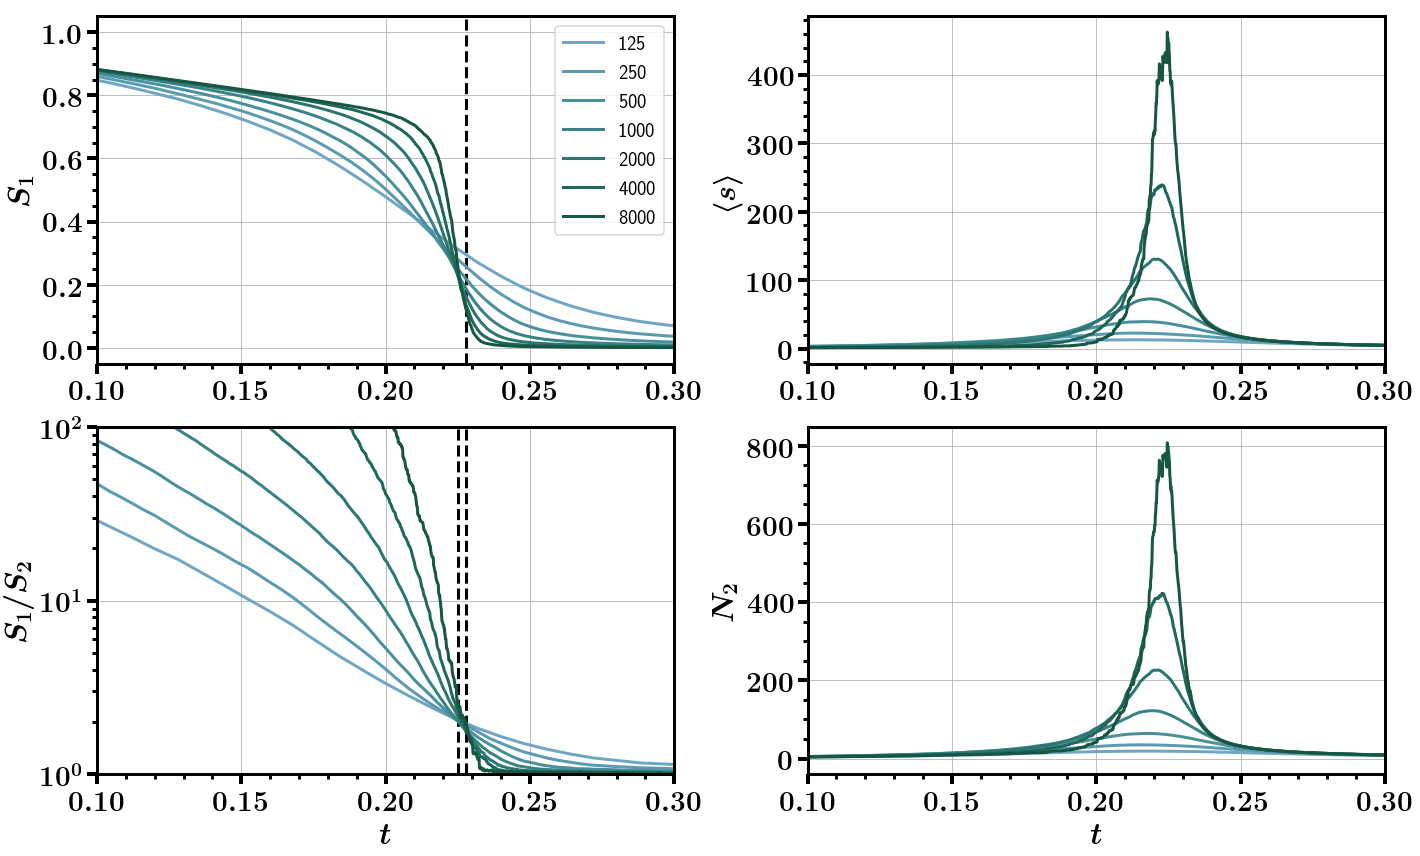

In [228]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

t_c = 0.228
_N_values = N_values[:-1]

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0.1, 0.3)
    ax.grid(True)

ax = axes[0][0]
ax.axvline(t_c, color='k', linestyle='--')
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/dfs[N]['Sgcc'][0], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][0]
ax.set_yscale('log')
ax.set_ylim(1, 100)
#ax.set_xlim(0.22, 0.23)
ax.axvline(0.225, color='k', linestyle='--')
ax.axvline(0.228, color='k', linestyle='--')
for N in _N_values:
    ax.plot(dfs[N]['t'], N*dfs[N]['Sgcc']/dfs[N]['Nsec'])
ax.set_ylabel(r'$S_1/S_2$')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Nsec'])
ax.set_ylabel(r'$N_2$')

axes[1][0].set_xlabel(r'$t$')
axes[1][1].set_xlabel(r'$t$')

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_btw2')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

3.633445137777796
7.2037536154314665
14.550065456224523
30.0426568089743
66.220075563253


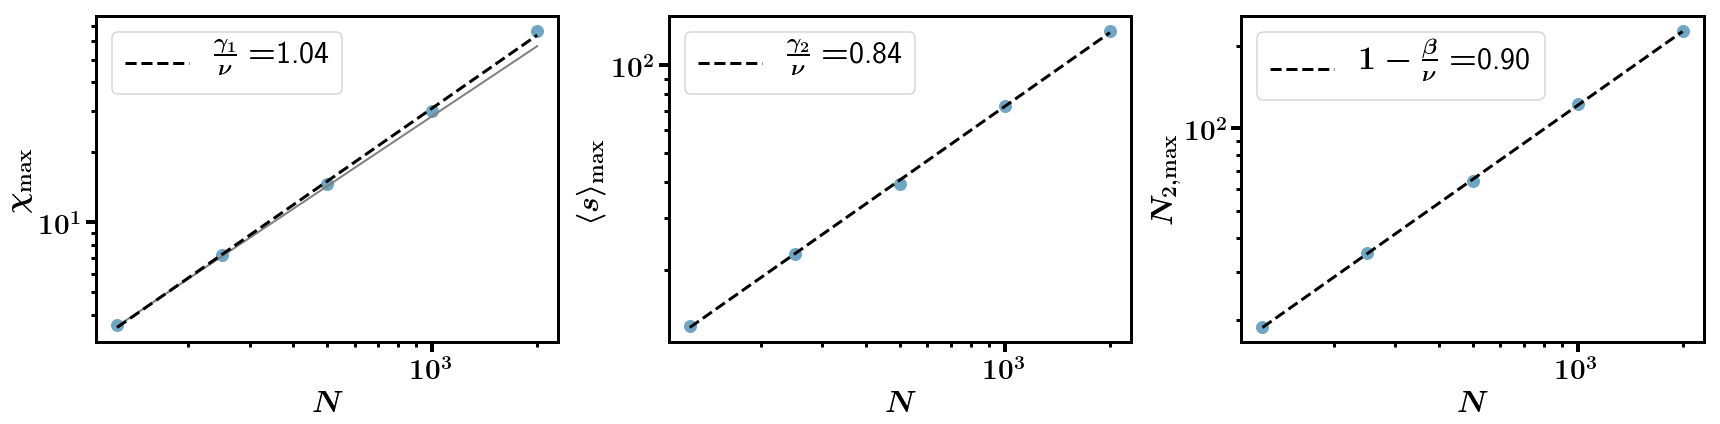

In [446]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

measures = ['varSgcc', 'meanS2', 'Nsec']

_N_values = N_values[:-3]

peaks = {}
slopes = {}
Y_preds = {}
for measure in measures:
    peak = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)
        if measure == 'varSgcc':
            print(Y)
    peaks[measure] = np.array(peak)

    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"$N$")    
    
for ax, measure in zip(axes, measures):
    ax.plot(_N_values, peaks[measure], 'o', markersize=12)
    
axes[0].plot(_N_values, np.array(_N_values)/35, '-', color='grey', linewidth=2)
axes[0].plot(_N_values, np.exp(Y_preds['varSgcc']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_1}{\nu} = $" + '{:.2f}'.format(slopes['varSgcc']))
axes[0].legend(loc='best', fontsize=32)    
axes[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

axes[1].plot(_N_values, np.exp(Y_preds['meanS2']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_2}{\nu} = $" + '{:.2f}'.format(slopes['meanS2']))
axes[1].legend(loc='best', fontsize=32)    
axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   

axes[2].plot(_N_values, np.exp(Y_preds['Nsec']), '--', color='k', linewidth=3, 
        label=r"$1 - \frac{\beta}{\nu} = $" + '{:.2f}'.format(slopes['Nsec']))
axes[2].legend(loc='best', fontsize=32)    
axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")   

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peaks_btw')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

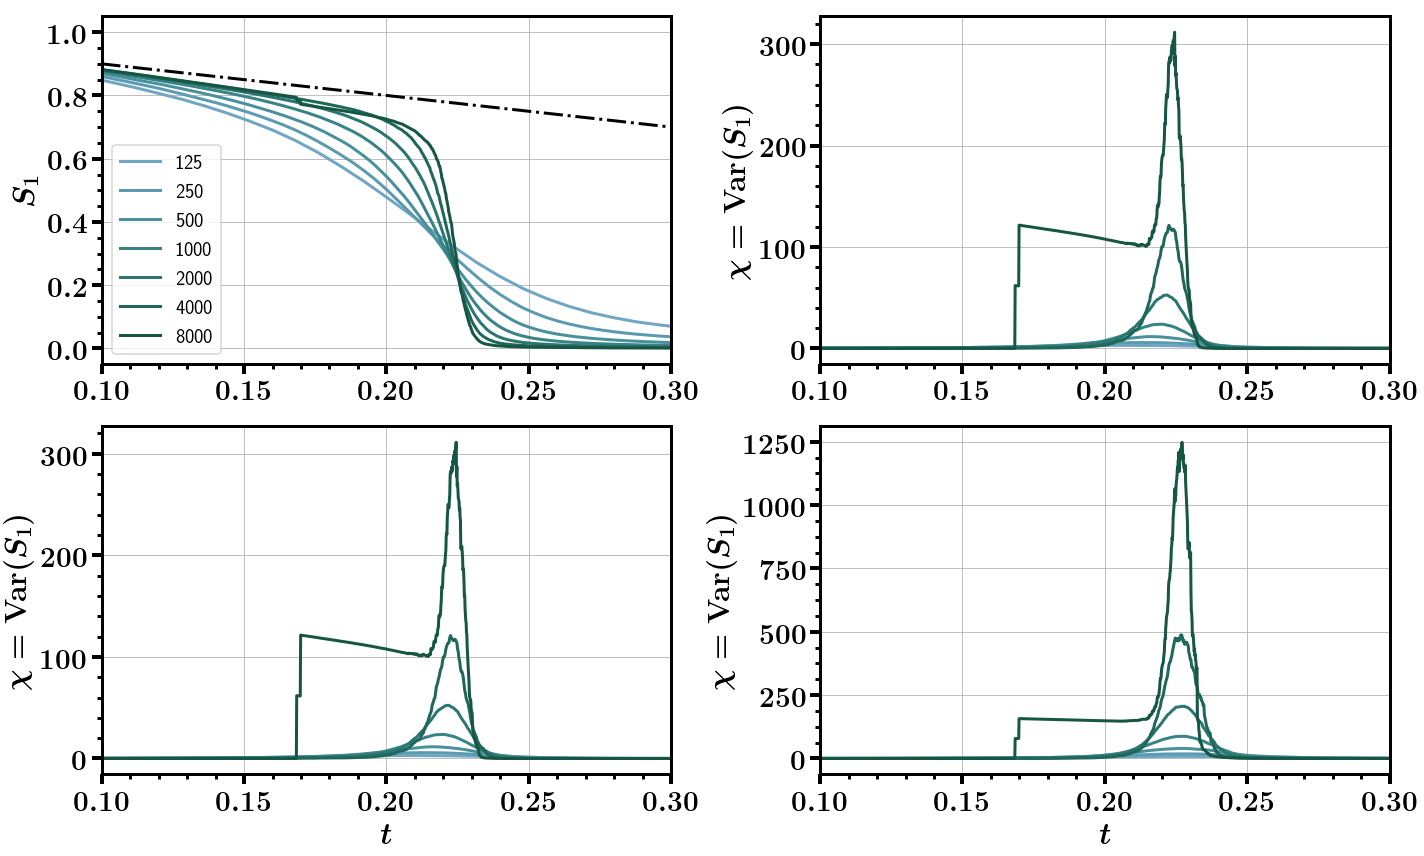

In [328]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values[:-1]

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0.1, 0.3)
    ax.grid(True)

ax = axes[0][0]
ax.plot(dfs[N]['t'], 1-dfs[N]['t'], color='black', linestyle='-.', label='')
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/dfs[N]['Sgcc'][0], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['varSgccV2'])
ax.set_ylabel(r'$\chi = \mathrm{Var}(S_1) $')

ax = axes[1][0]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['varSgcc'])
ax.set_ylabel(r'$\chi = \mathrm{Var}(S_1) $')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['varSgccV3'])
ax.set_ylabel(r'$\chi = \mathrm{Var}(S_1) $')

axes[1][0].set_xlabel(r'$t$')
axes[1][1].set_xlabel(r'$t$')

plt.tight_layout()
plt.show()

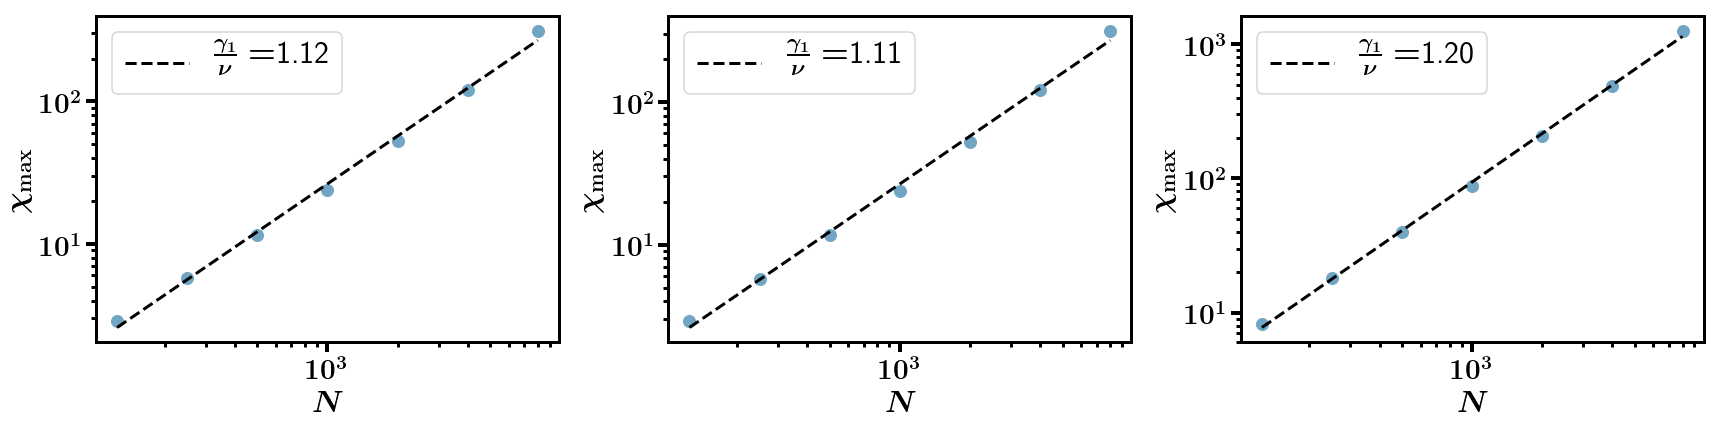

In [327]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

measures = ['varSgcc', 'varSgccV2','varSgccV3']

_N_values = N_values[:-1]

peaks = {}
slopes = {}
Y_preds = {}
for measure in measures:
    peak = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)
        #if measure == 'varSgcc':
        #    print(Y)
    peaks[measure] = np.array(peak)

    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"$N$")    
    
for ax, measure in zip(axes, measures):
    ax.plot(_N_values, peaks[measure], 'o', markersize=12)
    
axes[0].plot(_N_values, np.exp(Y_preds['varSgcc']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_1}{\nu} = $" + '{:.2f}'.format(slopes['varSgcc']))
axes[0].legend(loc='best', fontsize=32)    
axes[0].set_ylabel(r"$\chi_{\mathrm{max}}$")  

axes[1].plot(_N_values, np.exp(Y_preds['varSgccV2']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_1}{\nu} = $" + '{:.2f}'.format(slopes['varSgccV2']))
axes[1].legend(loc='best', fontsize=32)    
axes[1].set_ylabel(r"$\chi_{\mathrm{max}}$")  

axes[2].plot(_N_values, np.exp(Y_preds['varSgccV3']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_1}{\nu} = $" + '{:.2f}'.format(slopes['varSgccV3']))
axes[2].legend(loc='best', fontsize=32)    
axes[2].set_ylabel(r"$\chi_{\mathrm{max}}$")  

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peaks_btw')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

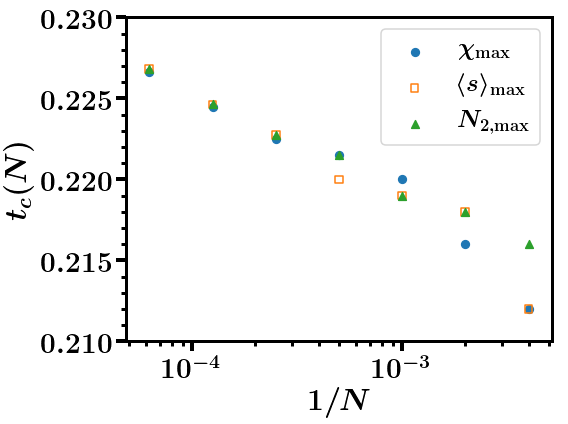

In [457]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

measures = ['varSgccV2', 'meanS2', 'Nsec']

_N_values = N_values[1:]

peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
facecolors = ['#1f77b4', 'none', '#2ca02c']
labels = [r"$\chi_{\mathrm{max}}$", r"$\langle s \rangle_{\mathrm{max}} $", r"$N_{2,\mathrm{max}}$"]
for i, measure in enumerate(measures):
      
    ax.scatter(1/np.array(_N_values), tc_values[measure], marker=markers[i], 
               color=colors[i], facecolor=facecolors[i], s=60, label=labels[i])

ax.set_ylabel(r'$t_c(N)$')
ax.set_ylim(0.21, 0.23)
#[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

#axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   
    
#axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")  
ax.legend(loc='best', fontsize=24)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'tc_btw')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

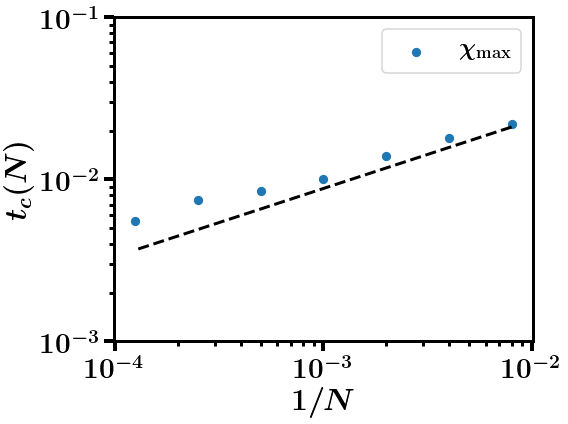

In [562]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

measures = ['varSgccV2', 'meanS2', 'Nsec']

_N_values = N_values[:-1]

peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
facecolors = ['#1f77b4', 'none', '#2ca02c']
labels = [r"$\chi_{\mathrm{max}}$", r"$\langle s \rangle_{\mathrm{max}} $", r"$N_{2,\mathrm{max}}$"]
for i, measure in enumerate(measures):
    if measure != 'varSgccV2':
        continue
    ax.scatter(1/np.array(_N_values), 0.23 - tc_values[measure], marker=markers[i], 
               color=colors[i], facecolor=facecolors[i], s=60, label=labels[i])

def powerlaw(X, a, c):
    return c*X**a

ax.plot(1/np.array(_N_values), powerlaw(1/np.array(_N_values), 0.42, 0.16), '--', color='k', linewidth=3)

ax.set_ylabel(r'$t_c(N)$')
ax.set_yscale('log')
ax.set_ylim(0.001, 0.1)
#[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

#axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   
    
#axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")  
ax.legend(loc='best', fontsize=24)
plt.tight_layout()
#fig_name = os.path.join(fig_dir, 'tc_btw')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

In [538]:
0.228-tc_values['meanS2']

array([0.012   , 0.016   , 0.01    , 0.009   , 0.008   , 0.00525 ,
       0.003375])

In [563]:
import fssa

_N_values = N_values[:-2]
Nmax = max(_N_values)
n_samples = len(_N_values)
rho = np.linspace(0, 1, Nmax)

a = np.zeros((n_samples, Nmax))
for i, N in enumerate(_N_values):
    for j in range(Nmax):
        a[i][j] = np.interp(j/Nmax, np.arange(N)/N, dfs[N]['meanS2'])

rho = rho[int(0.20*Nmax):int(0.25*Nmax)]
a = a[:, int(0.20*Nmax):int(0.25*Nmax)]
da = 0.1*a

In [627]:
import fssa

_N_values = N_values[:-2]
Nmax = max(_N_values)
n_samples = len(_N_values)
rho = np.linspace(0, 1, Nmax)

a = np.zeros((n_samples, Nmax))
for i, N in enumerate(_N_values):
    for j in range(Nmax):
        a[i][j] = np.interp(j/Nmax, np.arange(N)/N, dfs[N]['Sgcc'])

rho = rho[int(0.20*Nmax):int(0.25*Nmax)]
a = a[:, int(0.20*Nmax):int(0.25*Nmax)]
da = 0.1*a

0 0.469312
1 0.49306
2 0.5333232
3 0.5985766
4 0.6576126086956522
5 0.7042543859649123


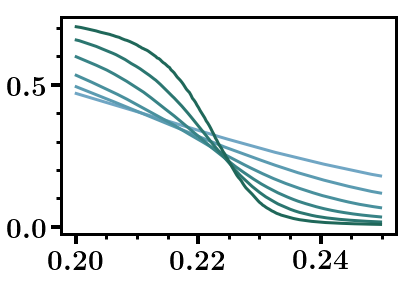

In [628]:
for i in range(n_samples):
    print(i, np.nanmax(a[i]))
    plt.plot(rho, a[i])

In [625]:
rho0 = 0.225
nu0 = 1.65
zeta0 = 1.8
ret = fssa.autoscale(_N_values, rho, a, da, rho0, nu0, zeta0)

In [626]:
# critical exponents and errors, quality of data collapse
print(ret.rho, ret.drho)
print(ret.zeta, ret.dzeta)
print(ret.nu, ret.dnu)
print(ret.nu - ret.zeta)
print(ret.fun)

0.2248041583840596 0.0012694175105751433
1.3715007742124514 0.15081481767222688
1.645568875811922 0.2072922424941525
0.2740681015994706
0.10570653195507256


In [629]:
rho0 = 0.225
nu0 = 1.65
zeta0 = -1.165
ret_sgcc = fssa.autoscale(_N_values, rho, a, da, rho0, nu0, zeta0)

In [631]:
# critical exponents and errors, quality of data collapse
print(ret_sgcc.rho, ret_sgcc.drho)
print(ret_sgcc.zeta, ret_sgcc.dzeta)
print(ret_sgcc.nu, ret_sgcc.dnu)
print(ret_sgcc.nu - ret_sgcc.zeta)
print(ret_sgcc.fun)

0.22771526563343875 0.0019738867769241728
-0.2904541186585668 0.11530654608577613
1.4491663077589094 0.1510852072103527
1.7396204264174762
0.08523588800668357


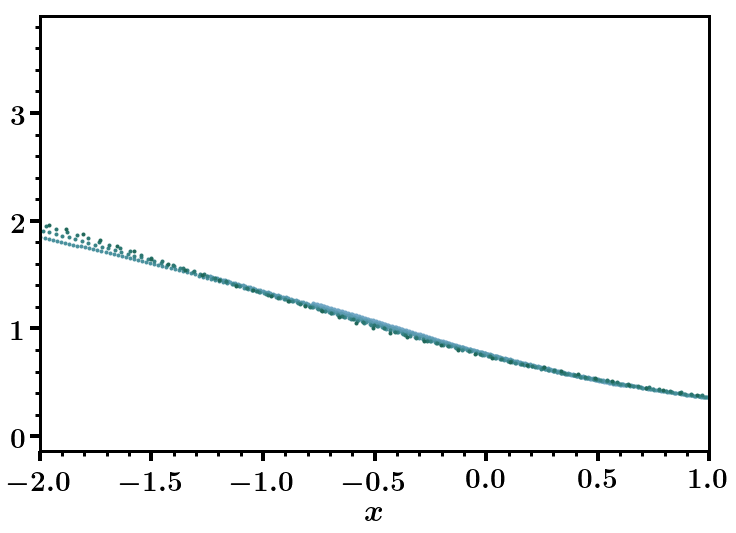

In [632]:
auto_scaled_data = fssa.scaledata(_N_values, rho, a, da, ret_sgcc.rho, ret_sgcc.nu, ret_sgcc.zeta)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_prop_cycle(cycler('color', palette))
ax.plot(
    auto_scaled_data.x.T, auto_scaled_data.y.T,
    '.',
)
ax.set_xbound(-2, 1)
ax.set_xlabel(r'$x$')
plt.show()

In [758]:
import pickle
import bz2

def counterToList(counter):

    try:
        counter[0][0]
    except:
        return [counter[0]]

    lst = []
    for s, ns in counter:
        lst += [s]*ns
    return sorted(lst, reverse=True)[1:]

def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

attack = 'BtwU'
all_comp_sizes_dict = {}
#for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
#Np_values = [[1000, 0.004], [4000, 0.001], [16000, 0.00025]]
Np_values = [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]
for N, p in Np_values:
    all_comp_sizes_dict[N] = {}
#f_values_by_attack = {'BtwU': [0.15, 0.2, 0.22, 0.228, 0.23]}
    #f_values = ['0.15', '0.22', '0.225']#, '0.228']#, '0.228']
    #f_values = ['0.10', '0.15', '0.2', '0.22', '0.225', '0.226', '0.227', '0.228', '0.23']
    #f_values = ['0.15', '0.2', '0.225', '0.235', '0.24']
    f_values = ['0.225']

    base_net_name = 'ER_N{}_p{}'.format(N, p)
    base_net_dir_name = os.path.join(net_dir_name, base_net_name)

    for f_value in f_values:
        print(f_value)
        comp_sizes_file = os.path.join(base_net_dir_name, 'comp_sizes_f{}.txt'.format(f_value))
        comp_sizes = np.loadtxt(comp_sizes_file, dtype=int)

        all_comp_sizes_dict[N][f_value] = comp_sizes
    


0.225
0.225
0.225
0.225
0.225
0.225


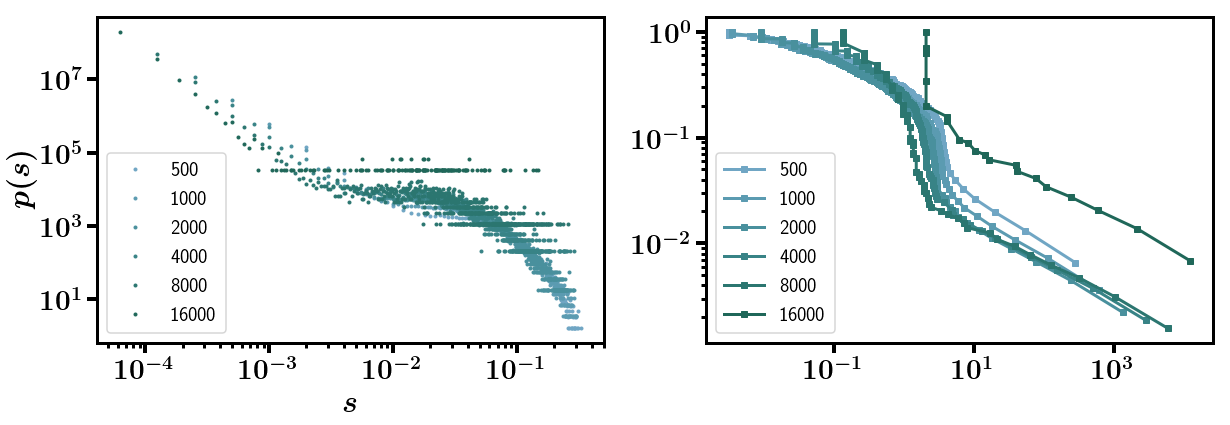

In [759]:
# log-scaled bins
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
y = {}
for N, p in Np_values:   
    Y = all_comp_sizes_dict[N][f_value]

    sorted_vals, ccdf = get_ccdf(Y)
    y[N] = (-np.diff(ccdf))*N**2
    ax.plot(sorted_vals[:-1]/N, y[N], '.', label=N)      

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1]
for N, p in Np_values:   
    Y = all_comp_sizes_dict[N][f_value]

    sorted_vals, ccdf = get_ccdf(y[N])
    ax.plot(sorted_vals/N, ccdf, 's-' , label=N)   


ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

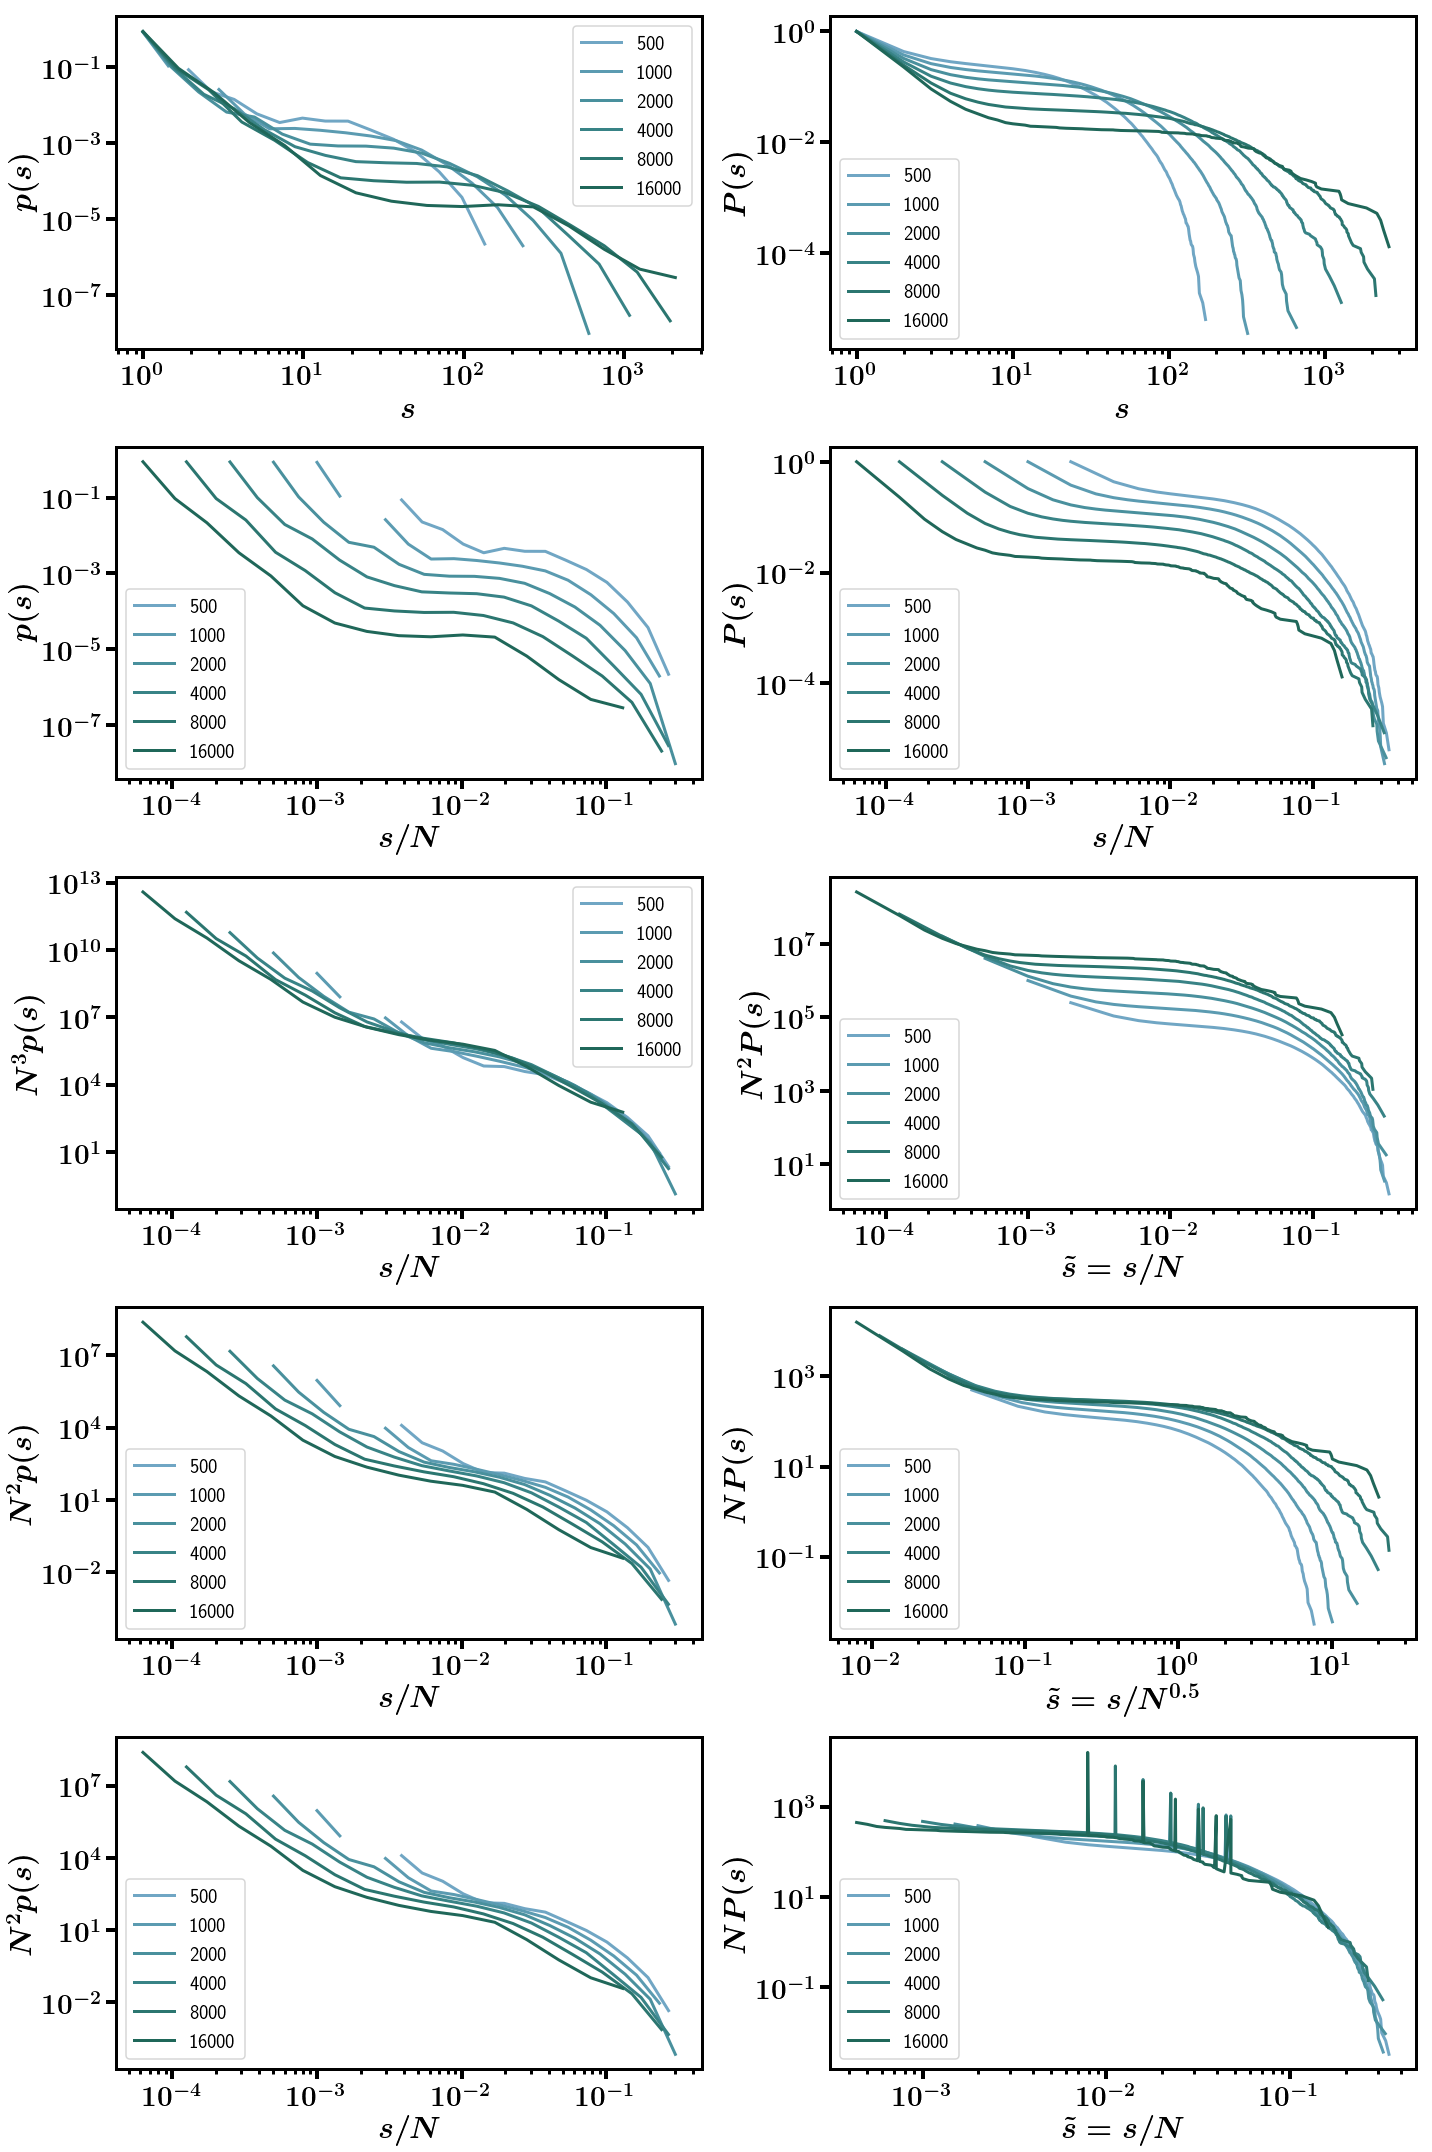

In [782]:
# log-scaled bins
ncols = 2
nrows = 5
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

attack = 'BtwU'

ax = axes[0][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm = hist_norm / np.sum(hist_norm)
    #hist_norm = hist[0]
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1], hist_norm, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[0][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals, ccdf, label=N)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm = hist_norm / np.sum(hist_norm)
    #hist_norm = hist[0]
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals/N, ccdf, label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    #bins=20
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    
    hist_norm = hist_norm / np.sum(hist_norm)
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm*N**3, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$N^3 p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals/N, ccdf*N**2, label=N)

ax.set_xlabel(r'$\tilde{s} = s/N$')
ax.set_ylabel(r'$N^2 P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[3][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    #bins=20
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    
    hist_norm = hist_norm / np.sum(hist_norm)
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm*N**2, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$N^2 p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[3][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals/N**0.5, ccdf*N, label=N)

ax.set_xlabel(r'$\tilde{s} = s/N^{0.5}$')
ax.set_ylabel(r'$N P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[4][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    #bins=20
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    
    hist_norm = hist_norm / np.sum(hist_norm)
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm*N**2, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$N^2 p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[4][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    trans_x = sorted_vals/N**0.5
    trans_y = ccdf*N
    
    eje_x = []
    for i, v in enumerate(trans_x):
        if v < 0.05:
            eje_x.append(sorted_vals[i]/N**0.5)
        else:
            eje_x.append(sorted_vals[i]/N)
    
    eje_y = trans_y
    
    eje_x, eje_y = zip(*sorted(zip(eje_x, eje_y), key=lambda x: x[0]))
    ax.plot(eje_x, eje_y, label=N)

ax.set_xlabel(r'$\tilde{s} = s/N$')
ax.set_ylabel(r'$N P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
#fig_name = os.path.join(fig_dir, 'comp_sizes_btw')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

In [364]:
attacks = ['BtwU', 'DegU', 'Ran']
Sgcc_values = {}
N = 16000
p = 0.00025
max_dfs = {}
for attack in attacks:
    Ngcc_values = []
    print(attack)

    for seed in range(50):
        network_base = 'ER_N{}_p{}'.format(N, p)
        network = network_base + '_{:05d}'.format(seed)
        attack_dir_name = os.path.join(net_dir_name, network_base, network, attack)
        
        full_file_name  = os.path.join(attack_dir_name, 'comp_data_' + network + '.txt')
        if not os.path.isfile(full_file_name):
            continue

        aux = np.loadtxt(full_file_name, dtype=float)
        _Ngcc_values = np.append(aux[:,0], np.repeat(np.NaN, (N-len(aux[:,0]))))

        Ngcc_values.append(_Ngcc_values)

    d = {'t': np.arange(N)/N,  'Sgcc': np.nanmean(Ngcc_values, axis=0)/N}
    df = pd.DataFrame(data=d)
    max_dfs[attack] = df

BtwU


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


DegU
Ran


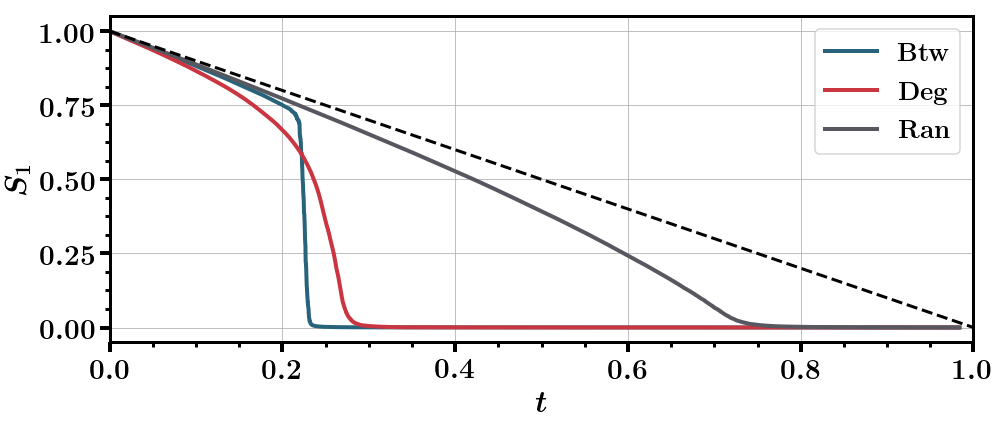

In [365]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(14*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.grid(True)
ax.set_ylabel(r'$S_1$')
ax.set_xlabel(r'$t$')
X = np.arange(N) / N
Y1 = max_dfs['BtwU']['Sgcc'] 
Y2 = max_dfs['DegU']['Sgcc']
Y3 = max_dfs['Ran']['Sgcc']
ax.set_xlim(0, 1)

ax.plot(X, Y1/Y1[0], label=r'$\mathrm{Btw}$', color='#27647b', linewidth=4)
ax.plot(X, Y2/Y2[0], label=r'$\mathrm{Deg}$', color='#ca3542', linewidth=4)
ax.plot(X, Y3/Y3[0], label=r'$\mathrm{Ran}$', color='#57575f', linewidth=4)
#ax.axvline(0.22, linestyle='-', color='grey')
ax.plot(X, 1 - X, color='k', linestyle='--')
ax.legend(loc='best')
#ax.text(0.01, 0.6, r'$N = 16000$', fontsize=26, 
#        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.5'))
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'percolation')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

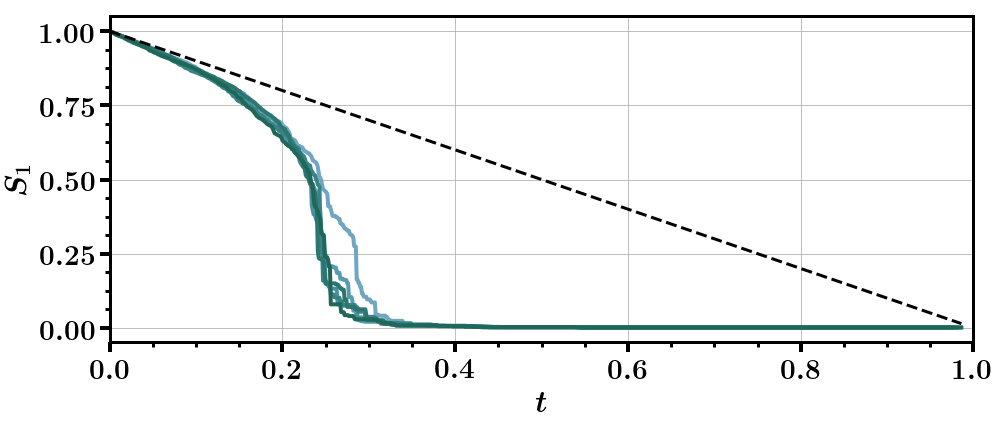

In [298]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(14*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.grid(True)
ax.set_ylabel(r'$S_1$')
ax.set_xlabel(r'$t$')
ax.set_xlim(0, 1)

N = 1000
p = 0.004
X = np.arange(N) / N

attack = 'DegU'

#color='#27647b',
for seed in range(6):
    network_base = 'ER_N{}_p{}'.format(N, p)
    network = network_base + '_{:05d}'.format(seed)
    attack_dir_name = os.path.join(net_dir_name, network_base, network, attack)

    full_file_name  = os.path.join(attack_dir_name, 'comp_data_' + network + '.txt')
    if not os.path.isfile(full_file_name):
        continue

    aux = np.loadtxt(full_file_name, dtype=float)
    _Ngcc_values = aux[:,0]
    N0 = _Ngcc_values[0]
    X = np.arange(N0) / N
    _Ngcc_values = np.append(_Ngcc_values, np.repeat(np.NaN, (N0-len(_Ngcc_values))))    
    Sgcc_values = np.array(_Ngcc_values) / N0
    ax.plot(X, Sgcc_values/Sgcc_values[0], linewidth=4)

#ax.axvline(0.22, linestyle='-', color='grey')
ax.plot(X, 1 - X, color='k', linestyle='--')
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'percolation')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

In [193]:
N = 2000
p = 0.002
network =  'ER_N{}_p{}'.format(N, p)
t_values = [0.0, 0.05, 0.10, 0.15, 0.20, 0.21, 0.215, 0.22, 0.225, 0.23]

btw_dist = {}
btw_dist_data = {}
for i, t in enumerate(t_values):
    print(t)
    file_name = "../networks/ER/" + network + "/btw_data_" + network + "_t{:.6f}.txt".format(t)
    btwSeq = np.loadtxt(file_name)

    mask = btwSeq > 0
    btwSeq = btwSeq[mask]       
    #btwSeq = btwSeq/np.mean(btwSeq)

    minb = min(btwSeq)
    maxb = max(btwSeq)
    
    meanb = np.mean(btwSeq)
    stdb = np.std(btwSeq)
    meanb2 = np.mean(btwSeq**2)

    bins = np.linspace(minb, maxb, 20)

    hist = np.histogram(btwSeq, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    
    btw_dist[t] = [bins, hist_norm]
    btw_dist_data[t] = [minb, maxb, meanb, stdb, meanb2]

0.0
0.05
0.1
0.15
0.2
0.21
0.215
0.22
0.225
0.23


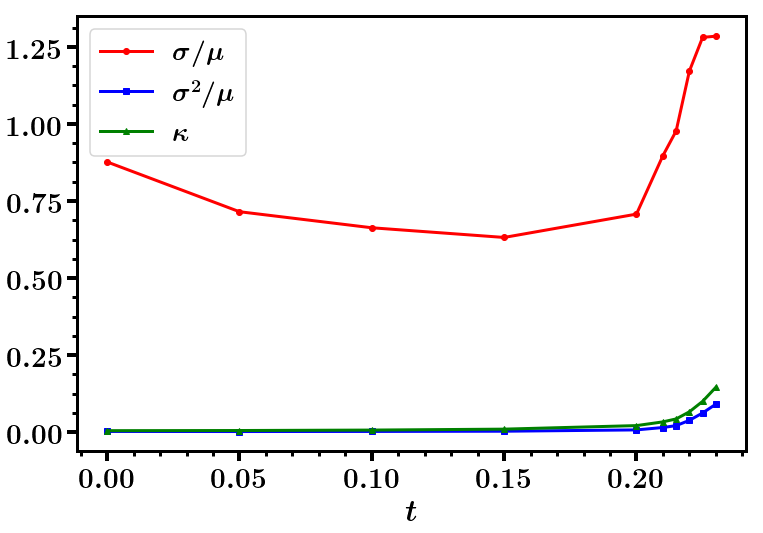

In [104]:
mean_values = []
mean2_values = []
std_values = []
for (t, data) in sorted(btw_dist_data.items(), key=lambda x: x[0]):
    mean_values.append(data[2])
    mean2_values.append(data[4])
    std_values.append(data[3])


mean_values = np.array(mean_values)
mean2_values = np.array(mean2_values)
std_values = np.array(std_values)
    
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(12*ncols, 8*nrows), ncols=ncols, nrows=nrows)
ax = axes
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$t$')
#ax.set_ylabel('$CV$')

X = t_values
Y = std_values / mean_values
Y2 = std_values**2 / mean_values
Y3 = mean2_values / mean_values
ax.plot(X, Y, 'o-', color='red', label=r'$\sigma / \mu$')
ax.plot(X, Y2, 's-', color='blue', label=r'$\sigma^2 / \mu$')
ax.plot(X, Y3, '^-', color='green', label=r'$\kappa$')
ax.legend(loc='best')
plt.show()

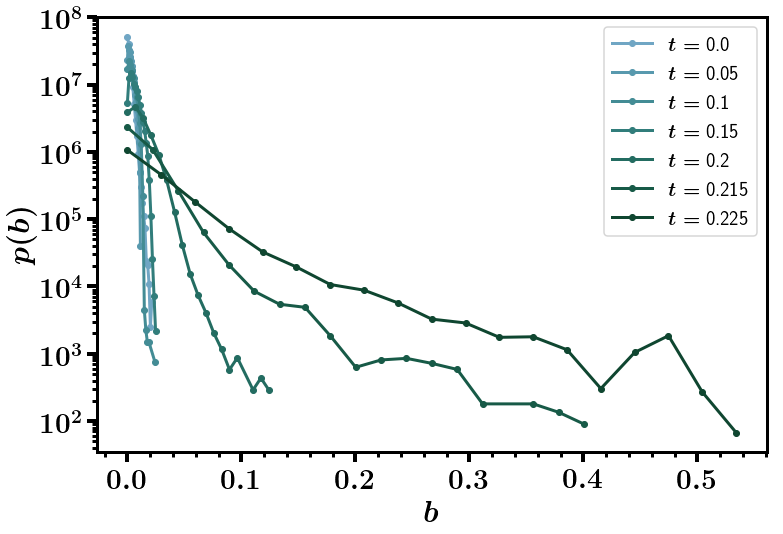

In [114]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(12*ncols, 8*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$b$')
#ax.set_xlim(0.0, 0.04)
ax.set_ylabel('$p(b)$')

def exp_strech(X, C, tau, beta):
    Y = C*np.exp(-(X/tau)**beta)
    return Y

X_strech = np.linspace(0, 0.6, 100)
Y_strech = exp_strech(X_strech, 10E7, 0.001, 0.4)

excluded = [0.21, 0.22, 0.23]
#excluded = []
    
for t in t_values:
    #if t != 0.05:
    #    continue
    #if t < 0.19:
    #    continue
    if t in excluded:
        continue
    bins, hist_norm = btw_dist[t]
    mask = ~np.isnan(hist_norm)
    X = bins[:-1]
    X = X[mask]
    Y = hist_norm[mask]
    ax.plot(X, Y, 'o-', label=r'$t = $' + ' {}'.format(t))

#ax.plot(X_strech, Y_strech, '--', color='k')
ax.legend(loc='best', fontsize=20)
plt.show()

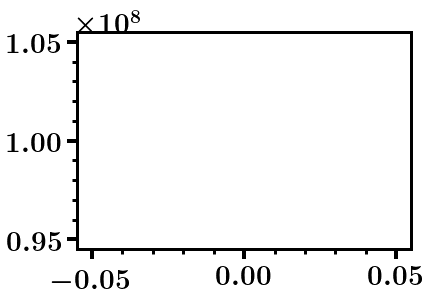

In [60]:
plt.plot(X_strech, Y_strech, '--', color='k')

In [75]:
#Y = C*np.exp(-(X/tau)**beta)
np.exp(-X_strech/1E-1)

array([1.        , 0.94119394, 0.88584603, 0.83375292, 0.78472319,
       0.73857671, 0.69514393, 0.65426525, 0.61579049, 0.57957828,
       0.54549556, 0.51341712, 0.48322508, 0.45480852, 0.42806302,
       0.40289032, 0.37919793, 0.35689879, 0.33591098, 0.31615738,
       0.29756541, 0.28006676, 0.26359714, 0.24809603, 0.23350648,
       0.21977488, 0.20685079, 0.19468671, 0.18323795, 0.17246245,
       0.16232061, 0.15277518, 0.14379107, 0.13533528, 0.12737675,
       0.11988622, 0.11283619, 0.10620074, 0.09995549, 0.0940775 ,
       0.08854517, 0.08333818, 0.07843739, 0.0738248 , 0.06948345,
       0.0653974 , 0.06155164, 0.05793203, 0.05452528, 0.05131886,
       0.048301  , 0.04546061, 0.04278725, 0.0402711 , 0.03790291,
       0.03567399, 0.03357615, 0.03160167, 0.0297433 , 0.02799421,
       0.02634798, 0.02479856, 0.02334025, 0.02196771, 0.02067587,
       0.01946001, 0.01831564, 0.01723857, 0.01622484, 0.01527072,
       0.01437271, 0.0135275 , 0.01273201, 0.01198329, 0.01127

In [61]:
Y_strech

array([1.e+08])

In [67]:
np.linspace(0, 0.6, 100)

array([0.        , 0.00606061, 0.01212121, 0.01818182, 0.02424242,
       0.03030303, 0.03636364, 0.04242424, 0.04848485, 0.05454545,
       0.06060606, 0.06666667, 0.07272727, 0.07878788, 0.08484848,
       0.09090909, 0.0969697 , 0.1030303 , 0.10909091, 0.11515152,
       0.12121212, 0.12727273, 0.13333333, 0.13939394, 0.14545455,
       0.15151515, 0.15757576, 0.16363636, 0.16969697, 0.17575758,
       0.18181818, 0.18787879, 0.19393939, 0.2       , 0.20606061,
       0.21212121, 0.21818182, 0.22424242, 0.23030303, 0.23636364,
       0.24242424, 0.24848485, 0.25454545, 0.26060606, 0.26666667,
       0.27272727, 0.27878788, 0.28484848, 0.29090909, 0.2969697 ,
       0.3030303 , 0.30909091, 0.31515152, 0.32121212, 0.32727273,
       0.33333333, 0.33939394, 0.34545455, 0.35151515, 0.35757576,
       0.36363636, 0.36969697, 0.37575758, 0.38181818, 0.38787879,
       0.39393939, 0.4       , 0.40606061, 0.41212121, 0.41818182,
       0.42424242, 0.43030303, 0.43636364, 0.44242424, 0.44848

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


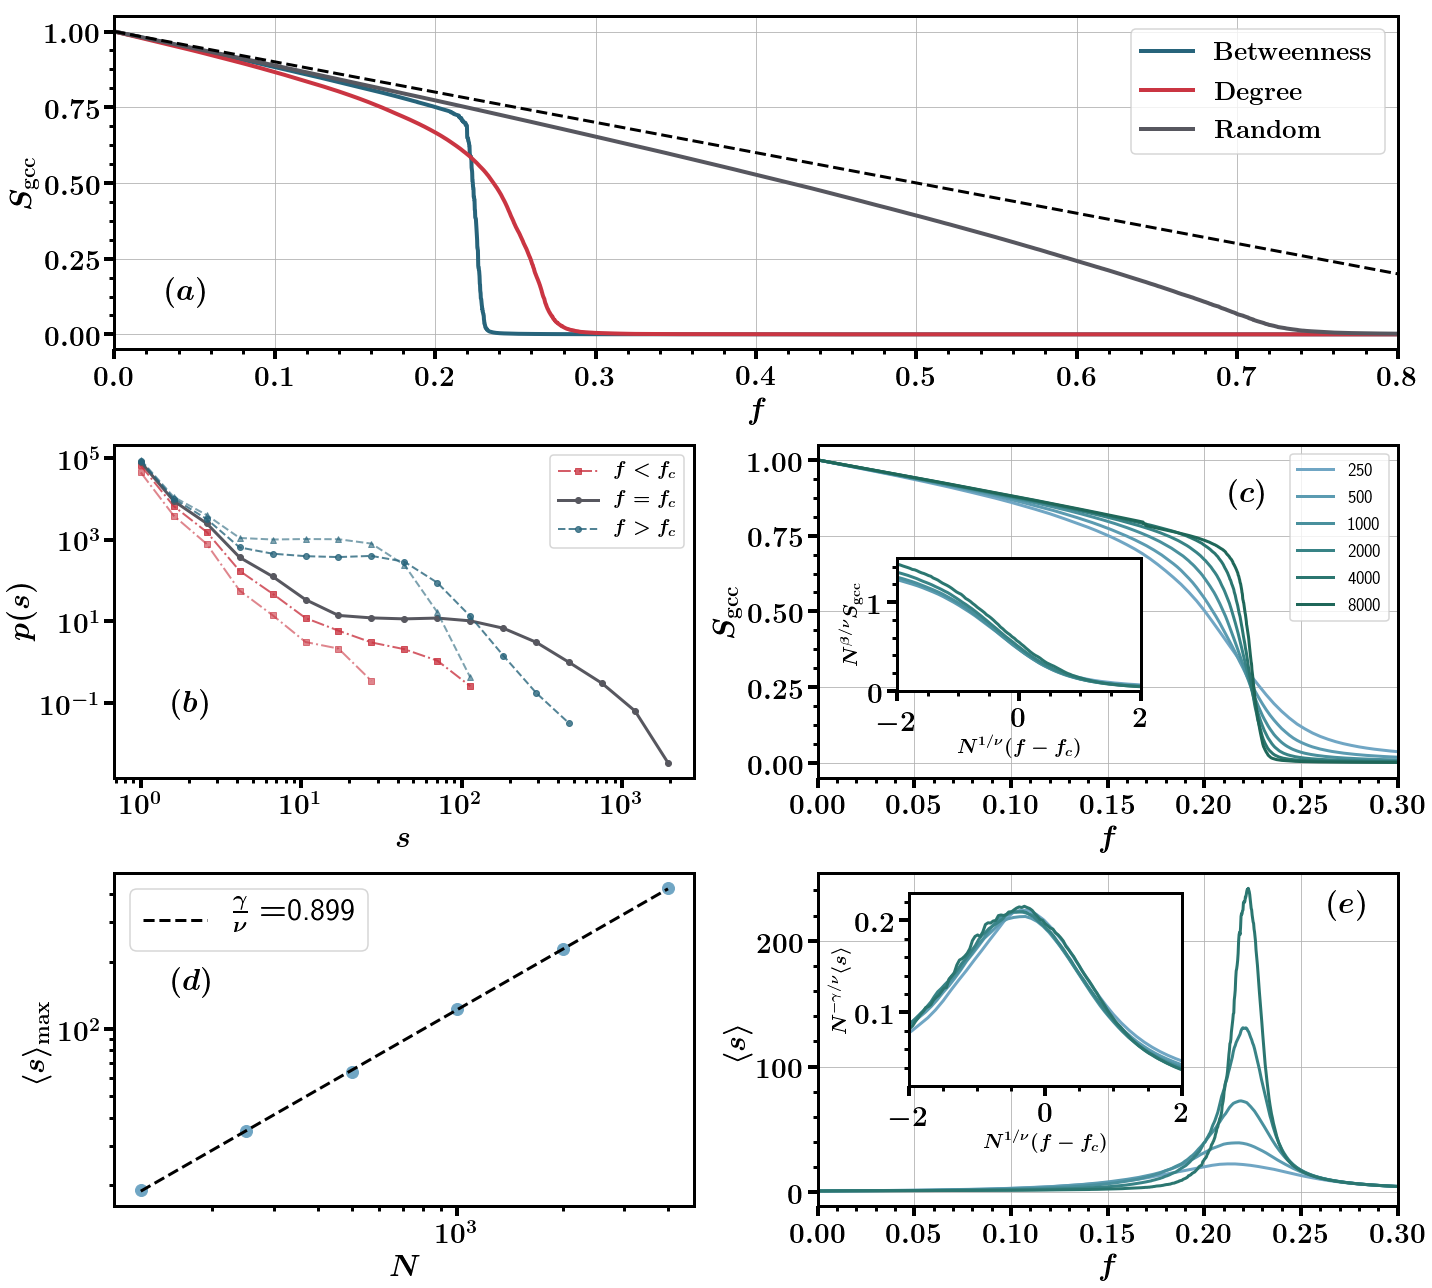

In [638]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

t_c_N = tc_values['meanS2']
attacks = ['BtwU', 'DegU', 'Ran']
N = 16000

plt.figure(figsize=(20, 18))

ax = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax.grid(True)
ax.set_ylabel(r'$S_{\mathrm{gcc}}$')
ax.set_xlabel(r'$f$')
X = np.arange(N) / N
Y1 = max_dfs['BtwU']['Sgcc'] 
Y2 = max_dfs['DegU']['Sgcc']
Y3 = max_dfs['Ran']['Sgcc']
ax.set_xlim(0, 0.8)
ax.text(0.04, 0.15, r'$(a)$', transform=ax.transAxes, fontsize=30)
#ax.plot(X, Y1/Y1[0], label=r'$\mathrm{Btw}$', color='#27647b', linewidth=4)
#ax.plot(X, Y2/Y2[0], label=r'$\mathrm{Deg}$', color='#ca3542', linewidth=4)
#ax.plot(X, Y3/Y3[0], label=r'$\mathrm{Ran}$', color='#57575f', linewidth=4)
ax.plot(X, Y1/Y1[0], label=r'$\mathrm{Betweenness}$', color='#27647b', linewidth=4)
ax.plot(X, Y2/Y2[0], label=r'$\mathrm{Degree}$', color='#ca3542', linewidth=4)
ax.plot(X, Y3/Y3[0], label=r'$\mathrm{Random}$', color='#57575f', linewidth=4)
#ax.axvline(0.22, linestyle='-', color='grey')
ax.plot(X, 1 - X, color='k', linestyle='--')
ax.legend(loc='best')
#ax.text(0.01, 0.6, r'$N = 16000$', fontsize=26, 
#        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.5'))


palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values[:-2]

measures = ['meanS2', 'Nsec']


peaks = {}
slopes = {}
Y_preds = {}

for measure in measures:
    peak = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)
    peaks[measure] = np.array(peak)

    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

t_c = 0.225
t_c = 0.22477
#t_c = 0.2277
gamma_over_nu = slopes['meanS2']
beta_over_nu = 1 - slopes['Nsec']
nu = 1.65
#beta_over_nu = -0.29/1.45
#nu = 1.45
gamma = gamma_over_nu*nu

ax = plt.subplot2grid((3, 2), (1, 1))
ax.text(0.71, 0.83, r'$(c)$', transform=ax.transAxes, fontsize=30)
ax.set_xlim(0., 0.3)
ax.set_xlabel(r'$f$')
ax.grid(True)
for N in _N_values[1:] + [8000]:
    ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/dfs[N]['Sgcc'][0], label='{}'.format(N))
ax.set_ylabel(r'$S_{\mathrm{gcc}}$')
ax.legend(loc='best', fontsize=18)

axins = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(.16, .3, .42, .4),
                   bbox_transform=ax.transAxes)
axins.set_ylabel(r'$N^{\beta / \nu} S_{\mathrm{gcc}}$', fontsize=20)
axins.set_xlabel(r'$N^{1 / \nu} (f-f_c)$', fontsize=20)
axins.set_xlim(-2, 2)
#axins.set_ylim(0., 1.5)
axins.set_ylim(0., 1.5)
for i, N in enumerate(_N_values[1:]):
    axins.plot((dfs[N]['t']-t_c)*N**(1/nu), 
    #axins.plot((dfs[N]['t']-t_c_N[i])*N**(1/nu), 
               dfs[N]['Sgcc']*N**(beta_over_nu), label='')
    #axins.plot((dfs[N]['t']-t_c)*N**(1/nu), 
    #           dfs[N]['Sgcc'], label='')
    

ax = plt.subplot2grid((3, 2), (2, 1))
ax.text(0.88, 0.88, r'$(e)$', transform=ax.transAxes, fontsize=30)
ax.set_xlabel(r'$f$')
ax.set_xlim(0., 0.3)
ax.grid(True)
for N in _N_values[1:]:
    ax.plot(dfs[N]['t'], dfs[N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

axins = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(.18, .4, .47, .58),
                   bbox_transform=ax.transAxes)
                   #loc=2, borderpad=3)
axins.set_ylabel(r'$N^{-\gamma / \nu} \langle s \rangle$', fontsize=20)
axins.set_xlabel(r'$N^{1 / \nu} (f-f_c)$', fontsize=20)
axins.set_xlim(-2, 2)
axins.set_ylim(0.02, 0.23)
for i, N in enumerate(_N_values[1:]):
    axins.plot((dfs[N]['t']-t_c)*N**(1/nu), 
    #axins.plot((dfs[N]['t']-t_c_N[i])*N**(1/nu), 
               dfs[N]['meanS2']*N**(-gamma_over_nu), label='')


ax = plt.subplot2grid((3, 2), (2, 0))
ax.text(0.10, 0.65, r'$(d)$', transform=ax.transAxes, fontsize=30)
ax.set_xlabel(r'$f$')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$N$")    

ax.plot(_N_values, peaks[measure], 'o', markersize=12) 
ax.plot(_N_values, np.exp(Y_preds[measure]), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma}{\nu} = $" + '{:.3f}'.format(slopes[measure]))
ax.legend(loc='best', fontsize=32)    
ax.set_ylabel(r"$\langle s \rangle_{\mathrm{max}}$")  

# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

labels = ['', r'$f < f_c$', r'$f = f_c$', r'$f > f_c$', '']
linestyles = ['-.', '-.', '-', '--', '--']

ax =  plt.subplot2grid((3, 2), (1, 0))
ax.text(0.1, 0.20, r'$(b)$', transform=ax.transAxes, fontsize=30)
attack = 'BtwU'

_colors = ['#ca3542','#ca3542', '#57575f', '#27647b', '#27647b']
_markers = [ 's', 's', 'o', 'o', '^', '^', '^', '^']
_alphas = [0.6, 0.8, 1, 0.8, 0.6]
_linewidths = [2, 2, 3, 2, 2]

for i, f_value in enumerate(f_values):
    Y = all_comp_sizes_dict[8000][f_value]
    bins = np.logspace(0, np.log10(8000), 20)
    hist = np.histogram(Y, bins=bins)
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    ax.plot(bins[:-1], hist_norm, label=labels[i], linestyle=linestyles[i], marker=_markers[i], 
            color=_colors[i], alpha=_alphas[i], linewidth=_linewidths[i])

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')


plt.tight_layout()
fig_name = os.path.join(fig_dir, 'lanet')
plt.savefig(fig_name + '.png', dpi=300)
plt.savefig(fig_name + '.pdf', dpi=300)
plt.show()

In [613]:
nu

1.65

In [614]:
beta_over_nu*nu

0.16591231171603485

In [615]:
gamma_over_nu*nu

1.3970449288895934